In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Tools.scripts.make_ctype import values

In [98]:
df=pd.read_csv("london_weather.csv",sep=",",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
1,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
2,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
3,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
4,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0


## Verimiz ne diyor
    Verimizi incelediğimizde 9 farklı değerimiz(sütunlar) bulunmaktadır.Her bir sütun bize ne demek istiyor;
   - date: O günün tarihini gösterir yyyy/mm/dd formatında yazılmıştır.Veri tipi int olarak görünmektedir.
   - cloud_cover: Oktas türünden bulut ötrüsü ölçümü.Veri tipi float'tır.
   - sunshine : Saat cinsinden güneş ışığı ölçüm değeri.Veri tipi float'tır.
   - global_radiation: Metrekare başına Watt cinsinden ışınım ölçüsü.Veri tipi float'tır.
   - max_temp:Santigrat derece (°C) olarak kaydedilen maksimum sıcaklık.Veri tipi float'tır.
   - mean_temp : Santigrat derece cinsinden ortalama sıcaklık (°C).Veri tipi float'tır.
   - min_temp : Santigrat derece (°C) olarak kaydedilen minimum sıcaklık.Veri tipi float'tır.
   - precipitation : yağışın milimetre (mm) cinsinden ölçümü.Veri tipi float'tır.
   - pressure : Pascal (Pa) cinsinden basınç ölçümü.Veri tipi float'tır.
   - snow_depth: Santimetre cinsinden kar kalınlığı ölçümü.Veri tipi float'tır.

In [99]:
df.isna().sum()

0       0
1      19
2       0
3      19
4       6
5      36
6       2
7       6
8       4
9    1441
dtype: int64

In [100]:
# sayısal veriler için isnull() metodu kullanılır.Daha doğrusu daha uygundur.
df.isnull().sum()

0       0
1      19
2       0
3      19
4       6
5      36
6       2
7       6
8       4
9    1441
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15342 entries, 0 to 15341
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15342 non-null  object
 1   1       15323 non-null  object
 2   2       15342 non-null  object
 3   3       15323 non-null  object
 4   4       15336 non-null  object
 5   5       15306 non-null  object
 6   6       15340 non-null  object
 7   7       15336 non-null  object
 8   8       15338 non-null  object
 9   9       13901 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


 - Verileirmizin csv üzerindeki veri tipi object olarak geçmektedir.Bunları sayısal verilere dönüştürmeden istedğimiz işlemleri yapamayız.

In [102]:
df[0]=pd.to_datetime(df[0],format="%y-%m-%d",errors="coerce")

In [103]:
df[1] = pd.to_numeric(df[1], errors='coerce')

In [104]:
ort=df[1].mean()
print(ort)

5.268241743897663


In [105]:
medyan=df[1].median()
print(medyan)

6.0


- Sütunun ortalama ve medyan değerlerini incelediğimizde ortalama değer ile doldurmamız bize veri dağılımını etkilemeden tüm veri değerlerini kazanmamızı sağlar.Medyan değeri bizim veri grubumuzun hafif sağa çarpık bir görüntüyee sahip olduğunu gösterir.Bu yuzden ortalama değerle hareket etmemiz daha uygun olur.

In [106]:
df[1]=df[1].fillna(ort)

In [107]:
ort=df[1].mean()
print(ort)

5.268241743897663


In [108]:
medyan=df[1].median()
print(medyan)

6.0


In [109]:
df[2]=pd.to_numeric(df[2],errors='coerce')

In [110]:
df[3]=pd.to_numeric(df[3], errors='coerce')

In [111]:
ort_3=df[3].mean()
print(ort_3)

118.75695078971414


In [112]:
medyan_3=df[3].median()
print(medyan_3)

95.0


- Bu sütunda verilerin dağılımının sola çarpık olduğunu görüyoruz.Bu yüzden null değerlerimizi medyan ile dolduracağız.

In [113]:
df[3]=df[3].fillna(medyan_3)

In [114]:
ort_3=df[3].mean()
print(ort_3)

118.72598096727937


In [115]:
medyan_3=df[3].median()
print(medyan_3)

95.0


In [116]:
df[4]=pd.to_numeric(df[4], errors='coerce')

In [117]:
ort_4=df[4].mean()
print(ort_4)

15.388777306814477


In [118]:
medyan_4=df[4].median()
print(medyan_4)

15.0


- Burada veri gurubumuz dengeli dağıldığını görüyoruz böyle durumlarda iki veri metriğinin herhangi biri için sonuç değişmeyecektir.Biz burada medyan ile dolduracağız.

In [119]:
df[4]=df[4].fillna(medyan_4)

In [120]:
medyan_4=df[4].median()
print(medyan_4)

15.0


In [121]:
ort_4=df[4].mean()
print(ort_4)

15.388599921783339


In [122]:
df[5]=pd.to_numeric(df[5], errors='coerce')

In [123]:
ort_5=df[5].mean()
print(ort_5)

11.475511270826528


In [124]:
medyan_5=df[5].median()
print(medyan_5)

11.4


- Bu sütunumuzda da verilerin normal dağılıma neredeyse tam diyebilieceğimiz şekilde dağılmıştır.Burada ki veri metriğinin herhangi biri için sonuç değişmeyecektir.Ancak böyle durumlarda ortalama değer ile doldurulması en doğru yöntemdir.

In [125]:
df[5]=df[5].fillna(medyan_5)

In [126]:
ort_5=df[5].mean()
print(ort_5)

11.475329161778125


In [127]:
medyan_5=df[5].median()
print(medyan_5)

11.4


In [128]:
df[6]=pd.to_numeric(df[6], errors='coerce')

In [129]:
ort_6=df[6].mean()
print(ort_6)

7.5598670056718165


In [130]:
medyan_6=df[6].median()
print(medyan_6)

7.8


- Bu sütunumuzda da verilerin normal dağılıma neredeyse tam diyebilieceğimiz şekilde dağılmıştır.Burada ki veri metriğinin herhangi biri için sonuç değişmeyecektir.Ancak böyle durumlarda ortalama değer ile doldurulması en doğru yöntemdir.

In [131]:
df[6]=df[6].fillna(ort_6)

In [132]:
ort_6=df[6].mean()
print(ort_6)

7.5598670056718165


In [133]:
medyan_6=df[6].median()
print(medyan_6)

7.8


In [134]:
df[7]=pd.to_numeric(df[7], errors='coerce')


In [135]:
ort_7=df[7].mean()
print(ort_7)

1.6686338441473754


In [136]:
medyan_7=df[7].median()
print(medyan_7)

0.0


- Bu sütunumuzda null değerlerden çok 0 değerlerinin fazlalığı gözüküyor.Bu durum geliştireceğimiz modeller açısından büyük bir yanıltmaya sebep olur.Bunu düzeltmek istiyorsak ortalama değeri enjekte etmemiz gerekir.Ancak bu sadece yağışın az olduğu günlerin fazla olması yine bu durumun sabit kalmasını sağlayacaktır.Yağışlı ortamlar için yapılacak bir modelde ortalama değerin üzerine 3 standart sapma ekleyerek (aykırı değer enjekte edilmesi ) verilerin modele adapte edilmesini sağlarız.

In [137]:
df[7]=df[7].fillna(ort_7)

In [138]:
ort_7 = df[7].mean()
print(ort_7)

1.6686338441473754


In [139]:
medyan_7=df[7].median()
print(medyan_7)

0.0


In [140]:
df[8]=pd.to_numeric(df[8], errors='coerce')

In [141]:
ort_8=df[8].mean()
print(ort_8)

101536.6055943144


In [142]:
medyan_8=df[8].median()
print(medyan_8)

101620.0


- Bu sütunumuzda verilerin hafif sağa çarpık bir dağılım göstermesi nedeniyle medyan değerini kullanacağız.

In [143]:
df[8]=df[8].fillna(medyan_8)

In [144]:
ort_8=df[8].mean()
print(ort_8)

101536.6327727806


In [145]:
medyan_8=df[8].median()
print(medyan_8)

101620.0


In [146]:
df[9]=pd.to_numeric(df[9], errors='coerce')

In [147]:
ort_9=df[9].mean()
print(ort_9)

0.03798561151079137


In [148]:
medyan_9=df[9].median()
print(medyan_9)

0.0


- Bu sütunumuzda aşırı bir biçimde sola çarpıklık görmekteyiz ama bunun en büyük sebebi kar kalınlığı değerinin doğal olarak (kar sıklıkla olan bir doğa olayı olmadığı için) 0 değerinin yoğunlukta olmasıdır.Daha anlaşılabilir bir sonuç için biz ortalama değer ile dolduracağız.Normalde sola çarpık grafikler için en uygun null değer medyandır.

In [149]:
df[9]=df[9].fillna(ort_9)

In [150]:
medyan_9=df[9].median()
print(medyan_9)

0.0


In [151]:
ort_9=df[9].mean()
print(ort_9)

0.03798561151079137


In [152]:
corr_matrix=df.corr()

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

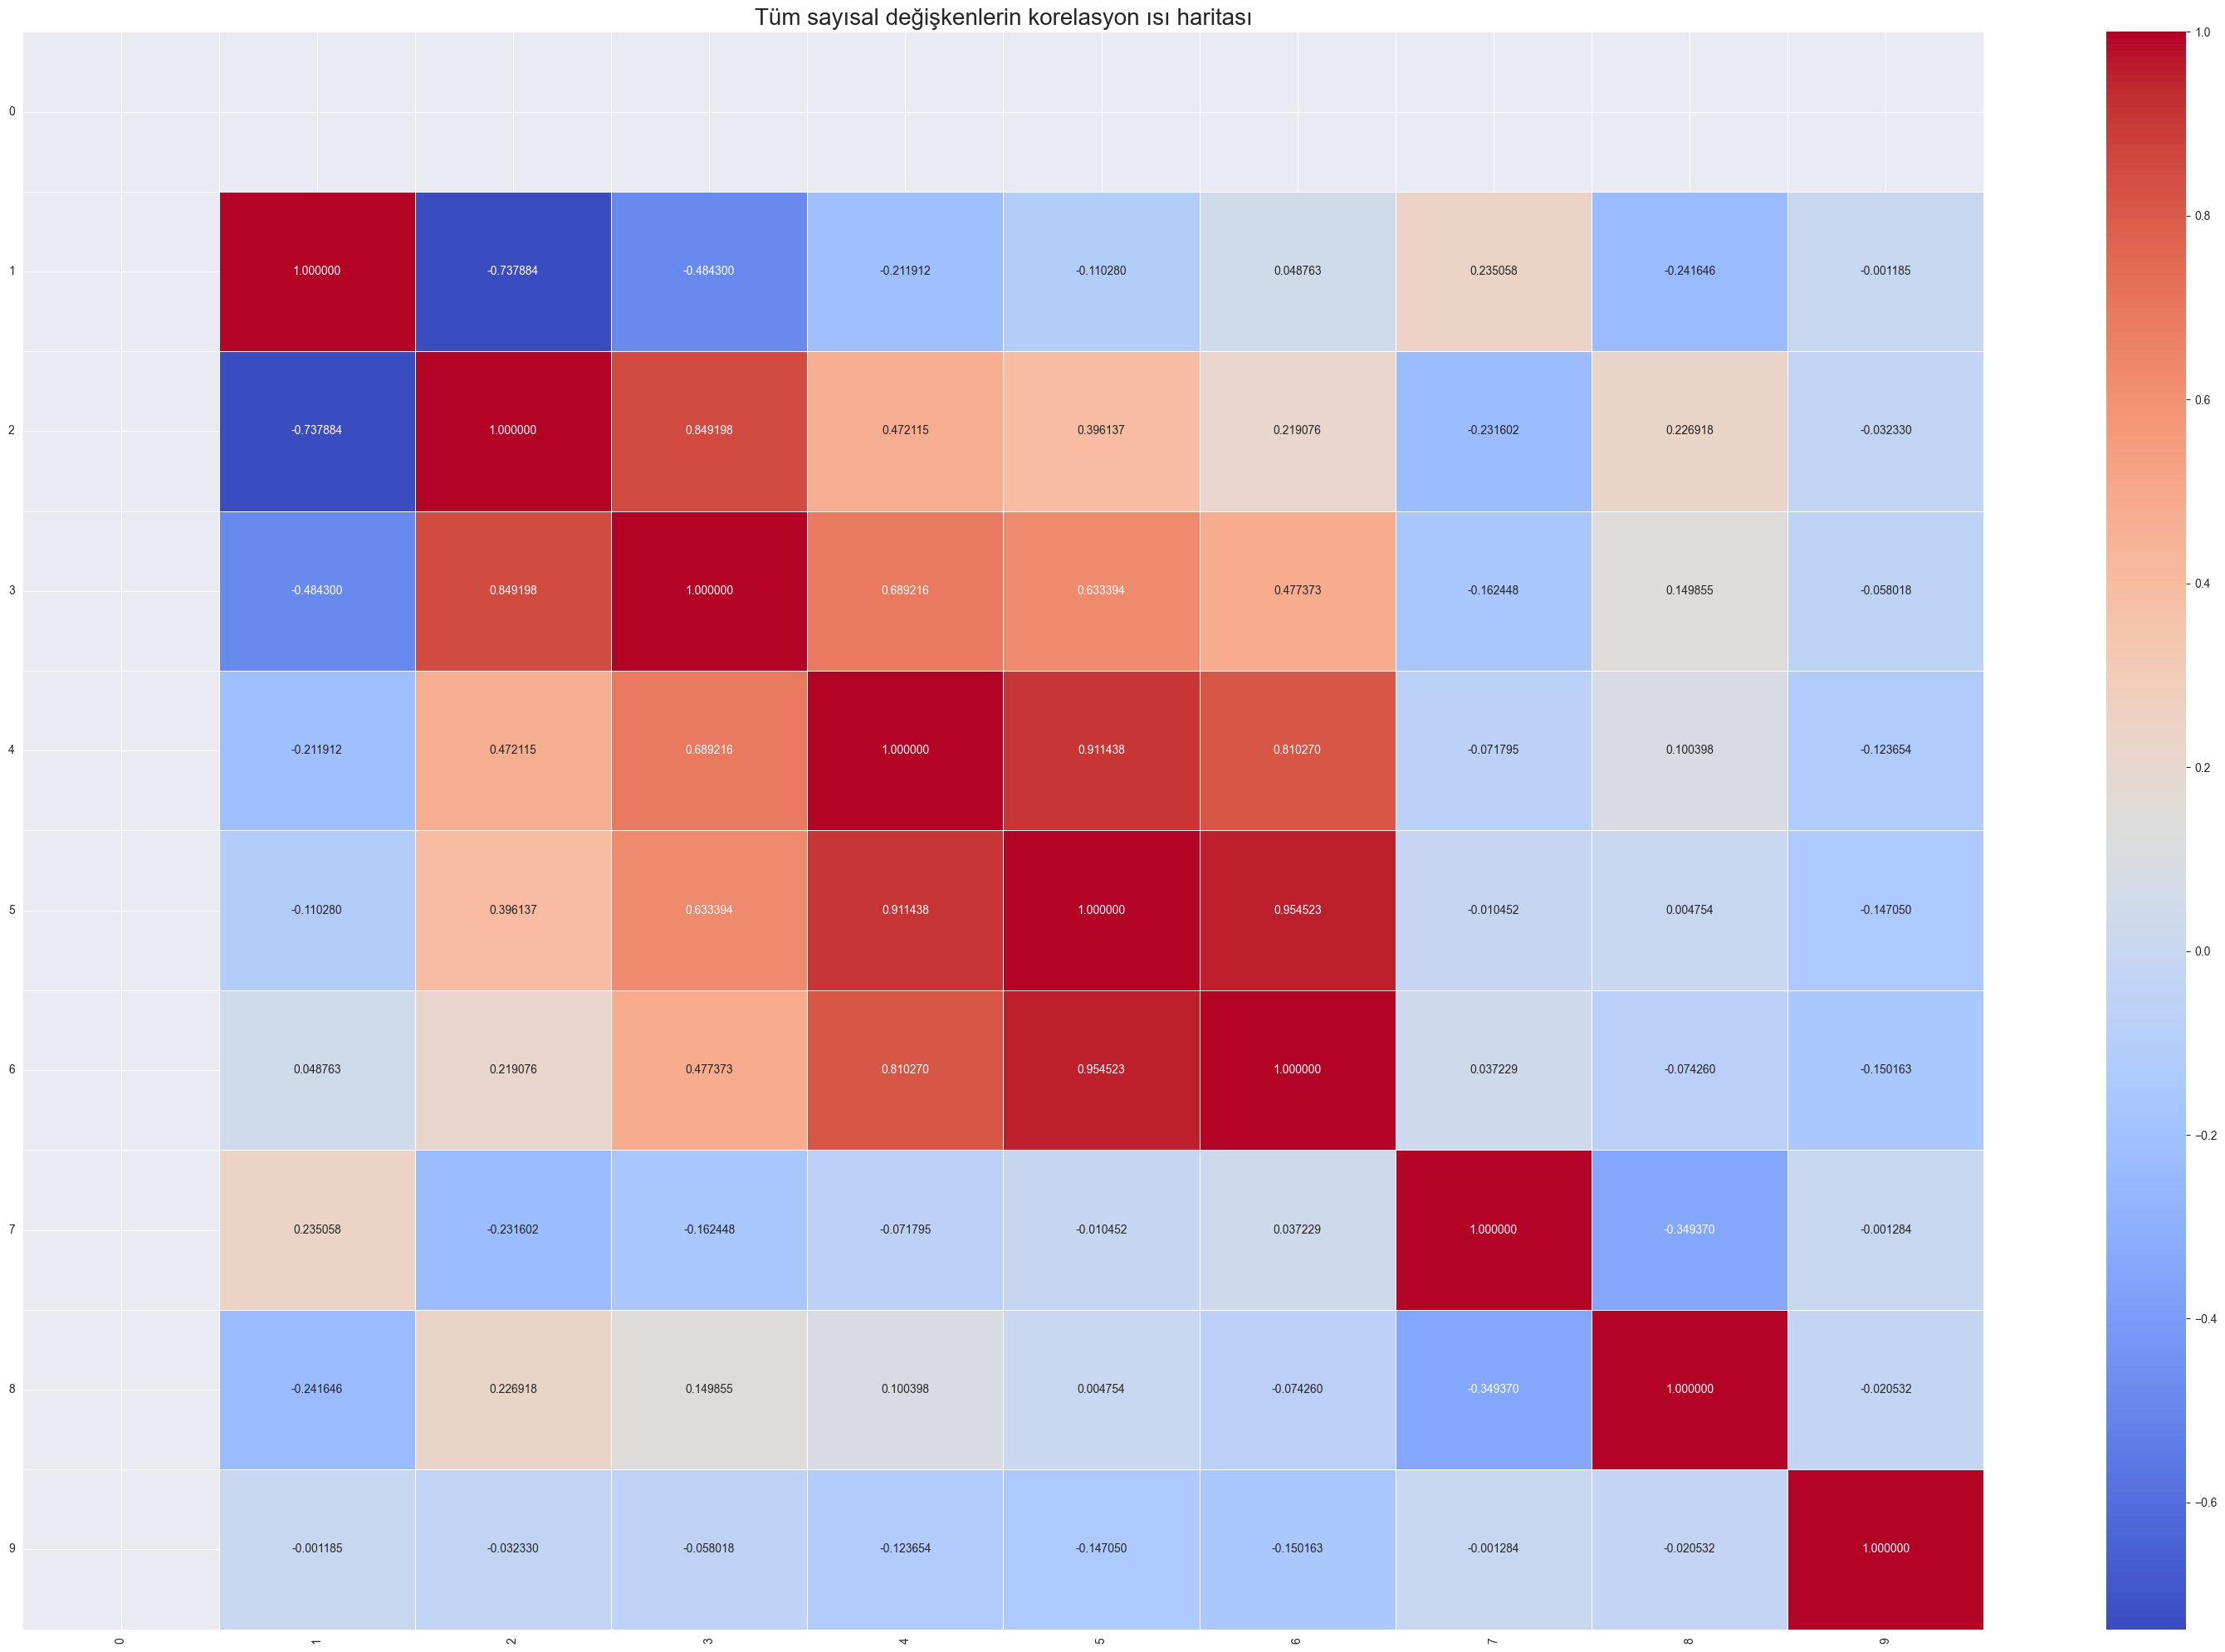

In [154]:
plt.figure(figsize=(30,20))

sns.heatmap(corr_matrix,annot=True,fmt='2f',cmap='coolwarm',linewidths=.5)
plt.title('Tüm sayısal değişkenlerin korelasyon ısı haritası',fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('correlation_heatmap.png')
plt.show()


# Korelasyon Analizi
### 🎯 En Güçlü İlişkiler
 ### Yağışı Arttıran (Pozitif Korelasyonlu) Faktörler - Kırmızı Bayraklar 🚩:
   - cloud_cover: Oktas türünden bulut ortüsü ölçümünün yağışı pozitif yönde etkilediği görülmektedir.Zaten mantıken herhangi bir yağış olayının olması için bulutların olması gerekmektedir.
   - min_temp:Santigrat cinsinden ölçülen en düşük sıcaklığın yağışı arttırdığını korelasyon ısı haritası üzerinden yorumlayabiliyoruz.Zaten havadaki bulutların yoğuşması için de düşük sıcaklık ortamı gerekmektedir.

### Yağışı Azaltan (Negatif Korelasyonlu) Faktörler - Yeşil Bayraklar 💚:
- pressure : Pascal (Pa) cinsinden basınç ölçümü.Hava basıncının yüksek olması yağışı oldukça etkileyen durumlardandır.
- sunshine : Saat cinsinden güneş ışığı ölçüm değeri.Güneş ışığının fazla olması havada bulutlanmanın az olduğunu gösterir.Bu durumda yağışı negatif şekilde etkiler.
- global_radiation: Metrekare başına Watt cinsinden ışınım ölçüsü.Işınımın etkili bir şekilde yeryüzüne ulaşması havada bulutlanmanın olmadığını gösteren yine başlıca sebeplerdendir.
- max_temp:Santigrat derece (°C) olarak kaydedilen maksimum sıcaklık.Yüksek sıcaklığın aslında direkt olarak yağış oranı ile bağlantısı yoktur.Yaz aylarının az yağışlı geçmesi dolaylı olarak etkiler.

### Yağışı Azaltan (Negatif Korelasyonlu) Faktörler - Az etkili olanlar
- mean_temp : Santigrat derece cinsinden ortalama sıcaklık (°C).Ortalma sıcaklık ortamlarında yağış için elverişli ortamlar oluşabilir.Yaz aylarında ortlama sıcaklığın fazla olması ve yağışın az olduğu bir mevsim olması sebebi ile negatif bir ilişki görülebilir.
- snow_depth: Santimetre cinsinden kar kalınlığı ölçümü.Kar yağışının olması ile bağlantılı kurulsa da kar kalınlığı kar yağışının olmadığı günlerde de ölçülebilien bir değer olduğu için az da olsa negatif bir korelasyona sahiptir.


## 3. Modelleme
📊 Değişken Ayrıştırması


In [155]:
#Eğitim/test ayrımı (ör. 80/20)
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

In [156]:
df_numeric=df.drop(df.columns[0],axis=1)

In [157]:
df_numeric[7]=df_numeric[7].apply(lambda x:1 if x>0 else 0 )

In [158]:
df_numeric

,1,2,3,4,5,6,7,8,9
0,5.268242,NaN,95.0,15.0,11.4,7.559867,1,101620.0,0.037986
1,2.000000,7.0,52.0,2.3,-4.1,-7.500000,1,101900.0,9.000000
2,6.000000,1.7,27.0,1.6,-2.6,-7.500000,0,102530.0,8.000000
3,5.000000,0.0,13.0,1.3,-2.8,-7.200000,0,102050.0,4.000000
4,8.000000,0.0,13.0,-0.3,-2.6,-6.500000,0,100840.0,2.000000
...,...,...,...,...,...,...,...,...,...
15337,1.000000,0.9,32.0,7.5,7.5,7.600000,1,98000.0,0.037986
15338,7.000000,3.7,38.0,3.6,1.1,-1.300000,1,97370.0,0.037986
15339,7.000000,0.0,21.0,4.1,2.6,1.100000,0,98830.0,0.037986
15340,6.000000,0.4,22.0,5.6,2.7,-0.100000,0,100200.0,0.037986


In [159]:
X=df_numeric.drop(df_numeric.columns[6],axis=1)
y=df_numeric[df_numeric.columns[6]]

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [161]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [162]:
models={
    'clf_gini': DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=5,min_samples_leaf=5,class_weight='balanced'),
    'logistic_regression': LogisticRegression(random_state=42,max_iter=10000,C=1.0,solver='lbfgs',class_weight='balanced'),
    'RandomForest':RandomForestClassifier(random_state=42,max_depth=5,min_samples_leaf=5,n_estimators=100,class_weight='balanced')
}


In [163]:
from  sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
folds = list(kf.split(X_train, y_train))

In [164]:
import time
def evulate_model(model,X_train,y_train,folds):
    fold_results ={
      'accuracy':[],'recall':[],'precision':[],'f1':[],'r2':[],'RMSE':[],'MAE':[],
        'roc_auc':[],'train_sizes':[],'fit_times':[]
     }
    for fold,(train_idx,val_idx) in enumerate(folds):
        X_fold_train,X_fold_val=X_train.iloc[train_idx],X_train.iloc[val_idx]
        y_fold_train,y_fold_val=y_train.iloc[train_idx],y_train.iloc[val_idx]

        start_time=time.time()
        model.fit(X_fold_train,y_fold_train)
        fit_time=time.time()-start_time

        y_preb=model.predict(X_fold_val)
        y_proba=model.predict_proba(X_fold_val)[:,1]

        fold_results['accuracy'].append(accuracy_score(y_fold_val,y_preb))
        fold_results['recall'].append(recall_score(y_fold_val,y_preb))
        fold_results['r2'].append(r2_score(y_fold_val,y_preb))
        fold_results['MAE'].append(mean_absolute_error(y_fold_val,y_preb))
        fold_results['RMSE'].append(np.sqrt(mean_absolute_error(y_fold_val,y_preb)))
        fold_results['precision'].append(precision_score(y_fold_val,y_preb))
        fold_results['f1'].append(f1_score(y_fold_val,y_preb))
        fold_results['roc_auc'].append(roc_auc_score(y_fold_val,y_proba))
        fold_results['train_sizes'].append(len(y_fold_train))
        fold_results['fit_times'].append(fit_time)
    return fold_results

In [166]:
all_model_results = {}
print("🚀 MODELLER K-FOLD CROSS VALIDATION İLE DEĞERLENDİRİLİYOR...")

for model_name, model in models.items():
    print(f"\n🎯 {model_name} değerlendiriliyor...")

    try:
        results = evulate_model(model, X_train, y_train, folds)
        all_model_results[model_name] = results

        print(f"   ✅ Accuracy:    {np.mean(results['accuracy']):.4f} (±{np.std(results['accuracy']):.4f})")
        print(f"   ✅ Recall:      {np.mean(results['recall']):.4f} (±{np.std(results['recall']):.4f})")
        print(f"   ✅ Precision:   {np.mean(results['precision']):.4f} (±{np.std(results['precision']):.4f})")
        print(f"   ✅ F1-Score:    {np.mean(results['f1']):.4f} (±{np.std(results['f1']):.4f})")
        print(f"   ✅ ROC-AUC:     {np.mean(results['roc_auc']):.4f} (±{np.std(results['roc_auc']):.4f})")
        print(f"   ✅ RMSE:    {np.mean(results['RMSE']):.4f} (±{np.std(results['RMSE']):.4f})")
        print(f"   ✅ R2_SCORE:    {np.mean(results['r2']):.4f} (±{np.std(results['r2']):.4f})")
        print(f"   ⏱️  Ortalama Eğitim Süresi: {np.mean(results['fit_times']):.2f}s")

    except Exception as e:
        print(f"❌ Hata : {model_name} değerlendirilemedi. ", {str(e)})
        all_model_results[model_name] = None


🚀 MODELLER K-FOLD CROSS VALIDATION İLE DEĞERLENDİRİLİYOR...

🎯 clf_gini değerlendiriliyor...
   ✅ Accuracy:    0.7333 (±0.0056)
   ✅ Recall:      0.7082 (±0.0284)
   ✅ Precision:   0.7294 (±0.0183)
   ✅ F1-Score:    0.7180 (±0.0093)
   ✅ ROC-AUC:     0.8071 (±0.0077)
   ✅ RMSE:    0.5164 (±0.0055)
   ✅ R2_SCORE:    -0.0686 (±0.0229)
   ⏱️  Ortalama Eğitim Süresi: 0.02s

🎯 logistic_regression değerlendiriliyor...
   ✅ Accuracy:    0.7077 (±0.0461)
   ✅ Recall:      0.7344 (±0.0240)
   ✅ Precision:   0.6838 (±0.0557)
   ✅ F1-Score:    0.7076 (±0.0404)
   ✅ ROC-AUC:     0.7777 (±0.0515)
   ✅ RMSE:    0.5390 (±0.0421)
   ✅ R2_SCORE:    -0.1712 (±0.1854)
   ⏱️  Ortalama Eğitim Süresi: 2.26s

🎯 RandomForest değerlendiriliyor...
   ✅ Accuracy:    0.7440 (±0.0069)
   ✅ Recall:      0.7524 (±0.0109)
   ✅ Precision:   0.7246 (±0.0101)
   ✅ F1-Score:    0.7382 (±0.0088)
   ✅ ROC-AUC:     0.8168 (±0.0070)
   ✅ RMSE:    0.5059 (±0.0068)
   ✅ R2_SCORE:    -0.0258 (±0.0281)
   ⏱️  Ortalama Eğitim Sür

In [168]:
result_summary= []
for model_name ,results in all_model_results.items():
    if results is not None:
        result_summary.append({
            'Model':model_name,
            'RMSE': f"{np.mean(results['RMSE']):.4f} (±{np.std(results['RMSE']):.4f})",
            'R2_SCORE': f"{np.mean(results['r2']):.4f} (±{np.std(results['r2']):.4f}) ",
            'ROC-AUC': f"{np.mean(results['roc_auc']):.4f} (±{np.std(results['roc_auc']):.4f})",
            'Train_time(s)':f"{np.mean(results['fit_times']):.2f}s"
        })


df_results=pd.DataFrame(result_summary)
df_results['ROC_AUC_Value']=df_results['ROC-AUC'].str.extract('([0-9.]+)').astype(float)
df_results=df_results.sort_values('ROC_AUC_Value',ascending=False).drop('ROC_AUC_Value',axis=1)

print("📊 3 MODELİN K-FOLD CROSS VALIDATION KARŞILAŞTIRMASI")
print(df_results.to_string(index=False))

📊 3 MODELİN K-FOLD CROSS VALIDATION KARŞILAŞTIRMASI
              Model             RMSE           R2_SCORE          ROC-AUC Train_time(s)
       RandomForest 0.5059 (±0.0068) -0.0258 (±0.0281)  0.8168 (±0.0070)         0.47s
           clf_gini 0.5164 (±0.0055) -0.0686 (±0.0229)  0.8071 (±0.0077)         0.02s
logistic_regression 0.5390 (±0.0421) -0.1712 (±0.1854)  0.7777 (±0.0515)         2.26s
